go to cmd and run

    mlflow ui
    
it will be here 
http://127.0.0.1:5000

the code line is  `mlflow ui -p <port u want must be int> --backend-store-uri <location Full one>`

type "$my path" if there is any spaces
my final line on cmd `mlflow ui -p 5555 --backend-store-uri "$E:\career\Dataa\github\ITI.Path\20.DS in production\Demo\mlflowFiles"`
i used this link http://127.0.0.1:5555
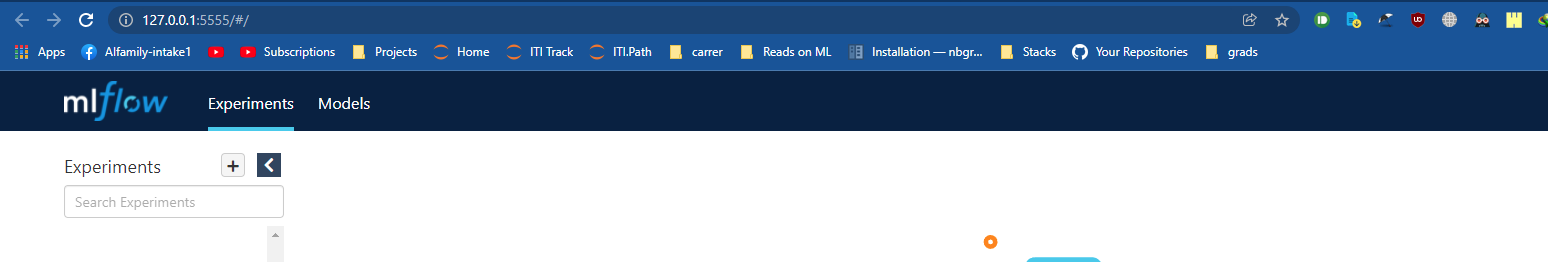

within the Location of the .gitignore aka the origial respory 
type `dvc init` then `dvc remote <where to Store the data>`
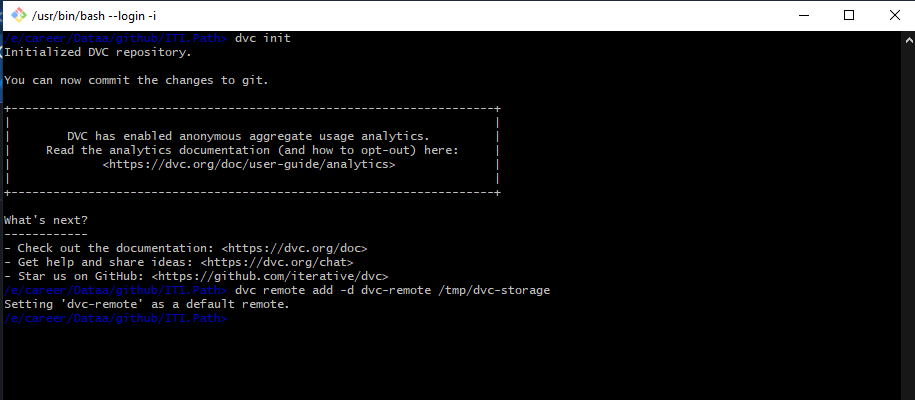

after change the Config file u can re commit the file and push it on github with any tool u like git bash or even git desktop 
but i will skip it it's not really needed here 
now cd where the data is (Copy it as u like) but go there to make it easier for us 
agian u can use CD with spaces now this time u dint need to add $ 
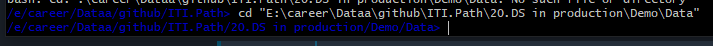
then type `dvc add <the File>`
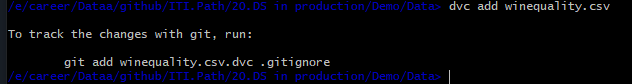
<br> PS: the data used here is just the white wine quality data u wont git lost finding it 
<br> it will say add it to git ignore (that is the Point of DVC actually to take care of these files) where ur git will take care of the Rest Codes and DVC hashes
`git add winequality.csv.dvc .gitignore`
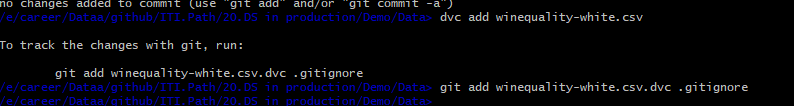
here the git layer and dvc layer are seperated 
<br> and git will only save the .dvc file which is much much smaller that the other one 

after this we can just commit them to the git with tag 
`git tag-a "v1" -m "raw data"` or with the desktop app 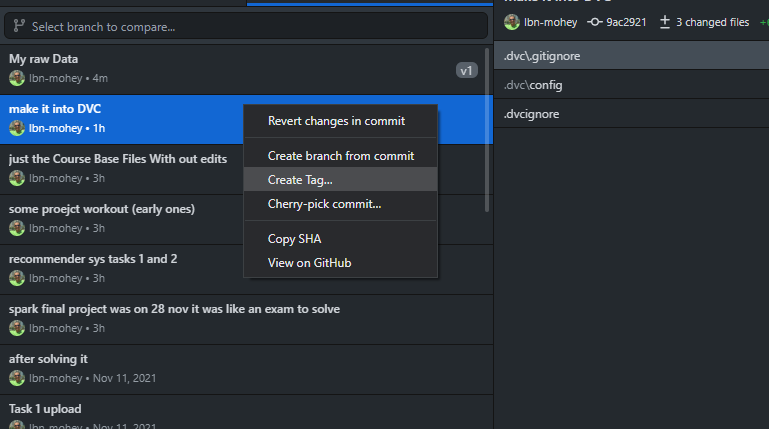
<br> dont forger `dvc push`

if u want to know where is file went there is 2 ways 
1- trust me it's probabily here C:\Users\<your user name>\AppData\Local\Temp\dvc-storage\5d
2- just `cd /tmp/dvc-storage/5d/` then `start .`
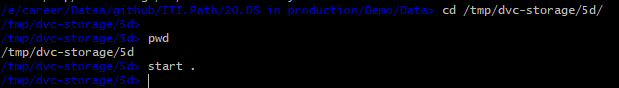
 i dont like this i will change it 
 from config file to better location for me

change any thing in the data and try to push it again 

In [2]:
import pandas as pd

In [130]:
wine = pd.read_csv("Demo/Data/winequality-white.csv")
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
4,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6


In [131]:
wine.drop([2,3,4],axis = 0,inplace = True)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
5,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
6,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
7,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5


In [132]:
wine.to_csv("Demo/Data/winequality-white.csv",index = False)
wine_2 = pd.read_csv("Demo/Data/winequality-white.csv")
wine_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
4,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5


after this type `dvc add winequality-white.csv`
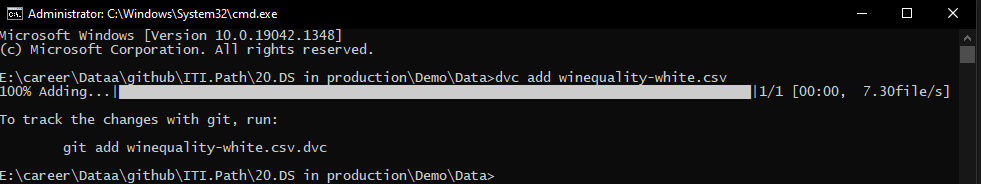
then `git add winequality-white.csv.dvc`
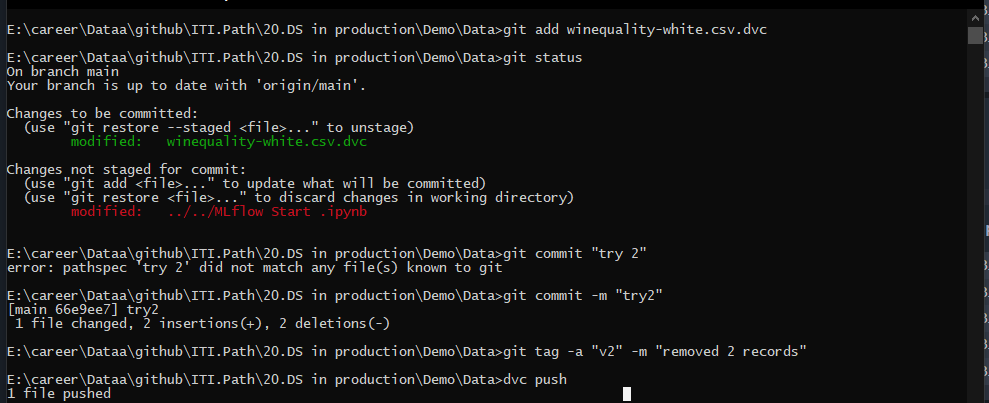
then all like the same

with the log or the history evey thing is fine now 
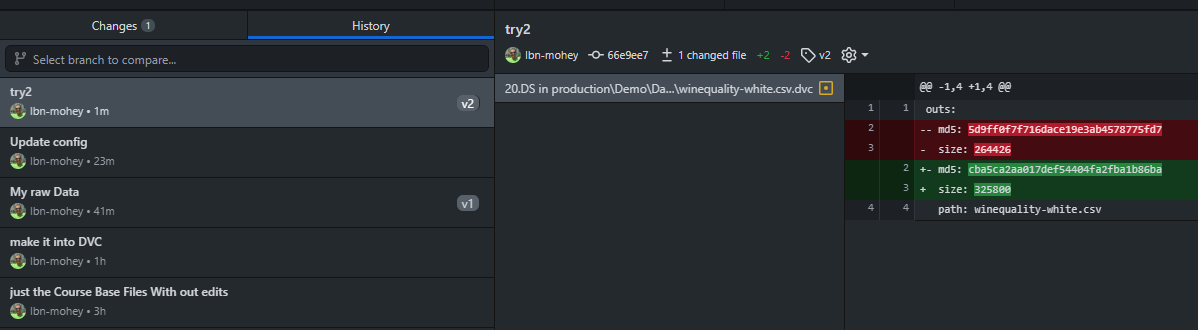
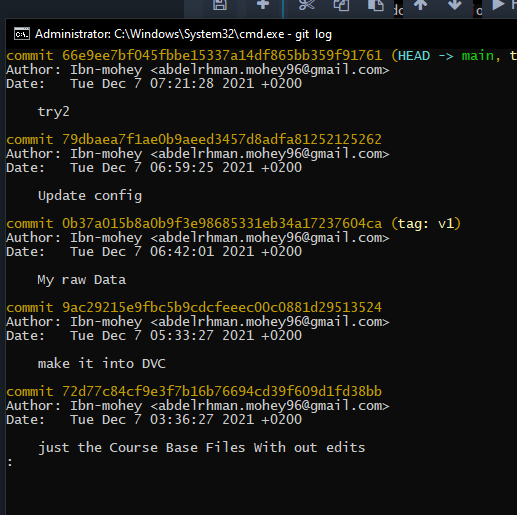

### Now to Track What Happend with more easier approch AKA MLFLow

In [14]:

# Note: on Databricks, the experiment name passed to mlflow_set_experiment must be a
# valid path in the workspace

# with mlflow.start_run():
#     mlflow.log_param("a", 7)
#     mlflow.log_metric("b", 4)

INFO: '/Demo One' does not exist. Creating a new experiment


In [3]:
import dvc.api
import mlflow
import pandas as pd

In [41]:
rev = input("version ?? v2 and v3 ??")
repo = "E:\\career\\Dataa\\github\\ITI.Path"
path = "20.DS in production\\Demo\\Data\\winequality-white.csv"

data_url = dvc.api.get_url(
path = path,repo = repo,rev = rev)
data = pd.read_csv(data_url)

version ?? v2 and v3 ??v3


In [30]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [43]:
import mlflow
import mlflow.sklearn
mlflow.end_run()
remote_server_uri = "http://127.0.0.1:5555" # set to your server URI
mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment("/Demo One")

rev = input("version ?? v2 and v3 ??")
repo = "E:\\career\\Dataa\\github\\ITI.Path"
path = "20.DS in production\\Demo\\Data\\winequality-white.csv"

data_url = dvc.api.get_url(
path = path,repo = repo,rev = rev)
data = pd.read_csv(data_url)

#save any thing make sure mlflow work here
path_folders = data_url.split("\\")
for i in path_folders:
    try:
        path_folders.remove("..")
    except:
        pass
cleaned_path =  "\\".join(path_folders)

# score = input("just for the sake of trying")
# mlflow.log_metrics("metric" , int(score))


def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


warnings.filterwarnings("ignore")
np.random.seed(40)

# Read the wine-quality csv file (make sure you're running this from the root of MLflow!)

data = pd.read_csv(data_url)

# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

# The predicted column is "quality" which is a scalar from [3, 9]
train_x = train.drop(["quality"], axis=1)
test_x = test.drop(["quality"], axis=1)
train_y = train[["quality"]]
test_y = test[["quality"]]

alpha = float(input("Alpha"))
l1_ratio = float(input("l1_ratio"))

with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)

    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)
    mlflow.log_param("data_url" , path_folders)
    mlflow.log_param("versin" , rev)
    mlflow.log_param("rows" , data.shape[0])
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(lr, "model")

version ?? v2 and v3 ??v3
Alpha.01
l1_ratio.1
Elasticnet model (alpha=0.010000, l1_ratio=0.100000):
  RMSE: 0.7413130719290711
  MAE: 0.582791450571835
  R2: 0.25414815678805214


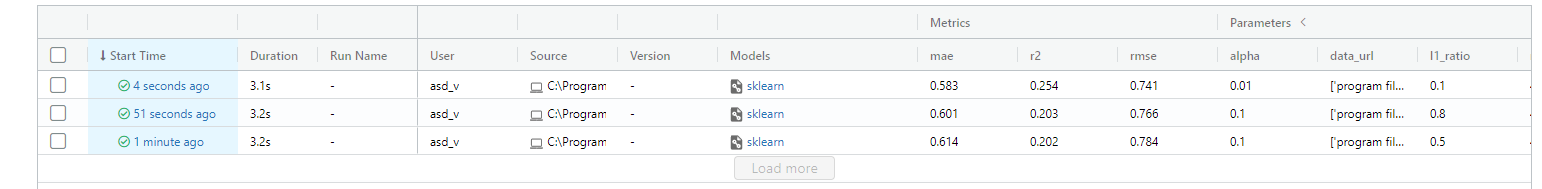